# Análise de dados - Cálculo de determinantes

### Bibliotecas importadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Extração de dados dos arquivos .csv

Para essa análise, definimos que a ordem de menor ordem de matriz seria igual a 4, e a maior ordem de matriz seria igual a 8.

Como a criação dos arquivos com os resultados dos testes seguem uma padronização, sendo determinado como: Resultado + ordem da matriz + .csv, com isso, implementamos uma estrutura de repetição e armazenamos em uma lista como os *Data Frames* dos resultados. 

In [2]:
matrizMin = 4 # menor ordem de matriz selecionada para análise
matrizMax = 8 # maior ordem de matriz selecionada para análise


resultado = list()

for i in range(matrizMin, matrizMax +1):
  resultado.append( pd.read_csv(f'../datasets/Resultado{i}.csv', sep=',') )

# Visualização padrão dos dados
resultado[0].head()

teste = resultado[0]

Os *Data Frames* apresentam a mesma estrutura, constituindo-se de três atributos representados com cada um dos métodos de cálculo de determinantes, com 1.000 (mil) registros em cada um dos arquivos. 

Os registro numéricos representam o tempo de execução de resolução da determinante, em seus respectivos métodos. A unidade de tempo utilizada foi em nanosegundos.

## Tratamento dos dados
Para iniciarmos a nossa investigação, consultamos a dispersão de resultados em cada um dos atributos de cada tabela. Por meio de um gráfico *Box Plot*, notamos sempre haver resultados fora do desvio padrão, o que numericamente eleva a média aritimética, e gráficamente comprime o *Box Plot*, assim dificultando a visualização.

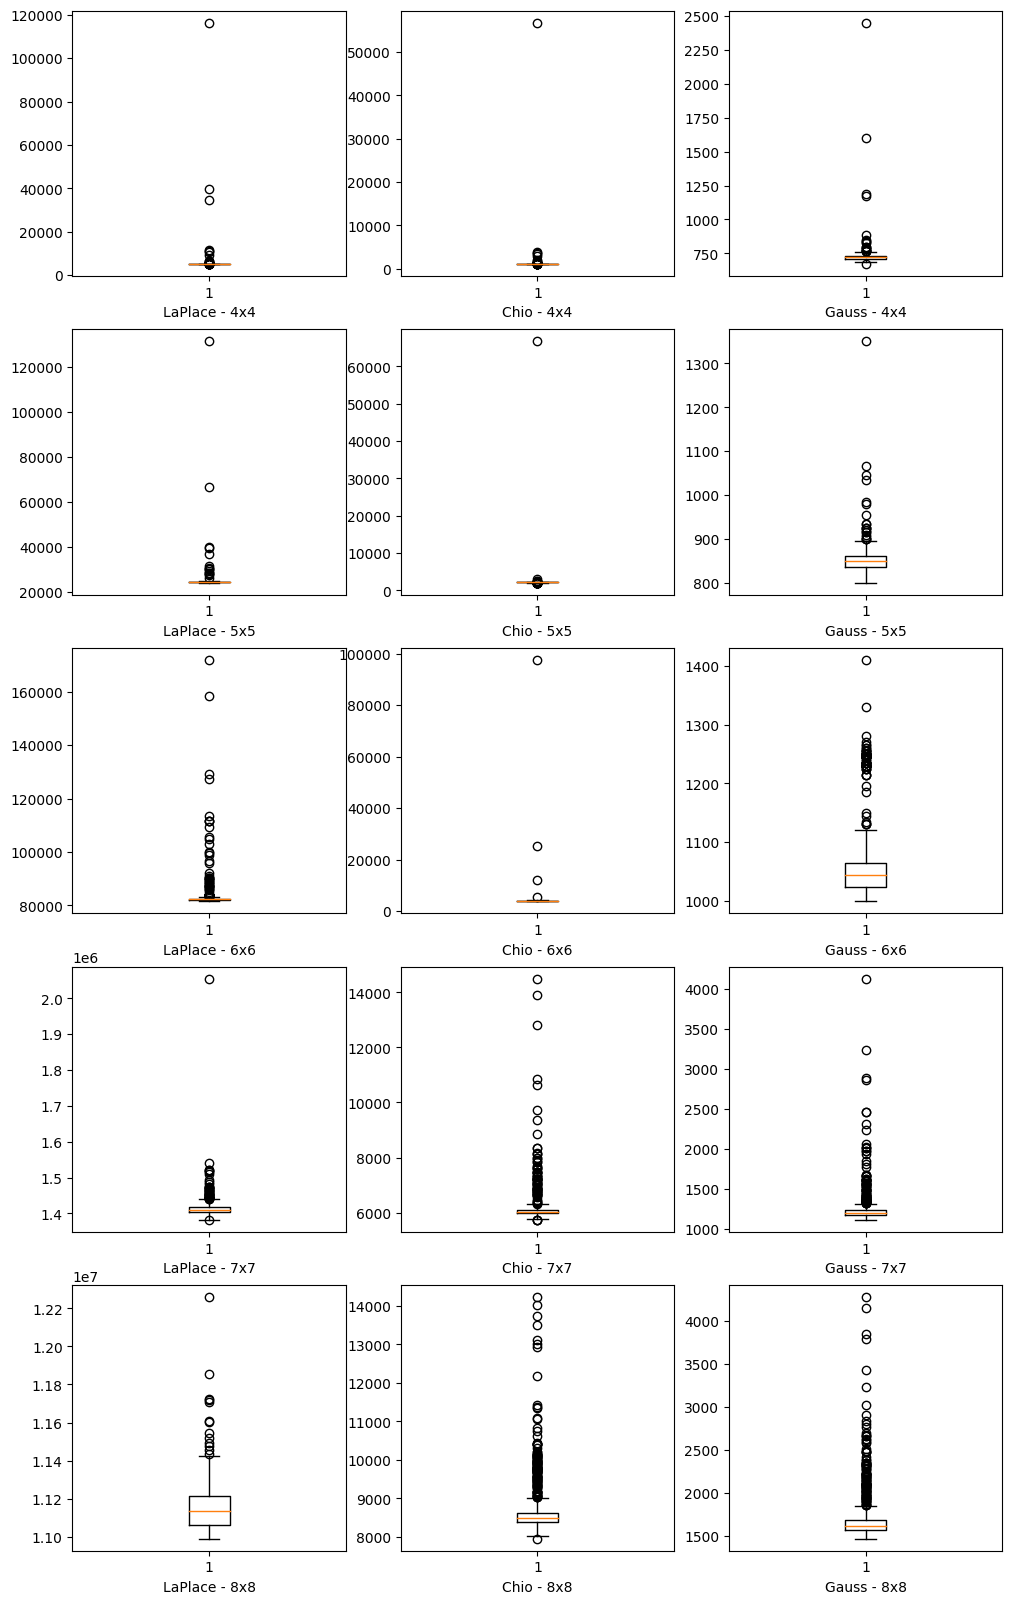

In [17]:
# gráficos da dispersão de dados por atributo
fig, ax = plt.subplots(figsize=(12, 20)) 
i = 1
o = 4
ax.remove()
for matriz in resultado:
    for key,value in enumerate(matriz):
        
        plt.subplot(5, 3, i) 
        plt.xlabel(f"{value} - {o}x{o}")
        plt.boxplot(matriz[value])
        i+=1
    o+=1
plt.show() 

Para solucionar essa questão, optamos por utilizar a abordagem **intervalo interquartil (IQR)**, para encontrar valores discrepantes. Para localizar um valor de base atípico, define-se o valor do IQR, multiplicado por 1,5 (IQR * 1.5), o limite superior e inferior são determinados pelas seguintes fórmulas:

superior = Quartil 3 + 1,5 * IQR

inferior = Quartil 1 - 1,5 * IQR

Na fórmula acima, de acordo com as estatísticas, utilizada para considerar todos os dados entre 2,7 desvios padrão na Distribuição Gaussiana.

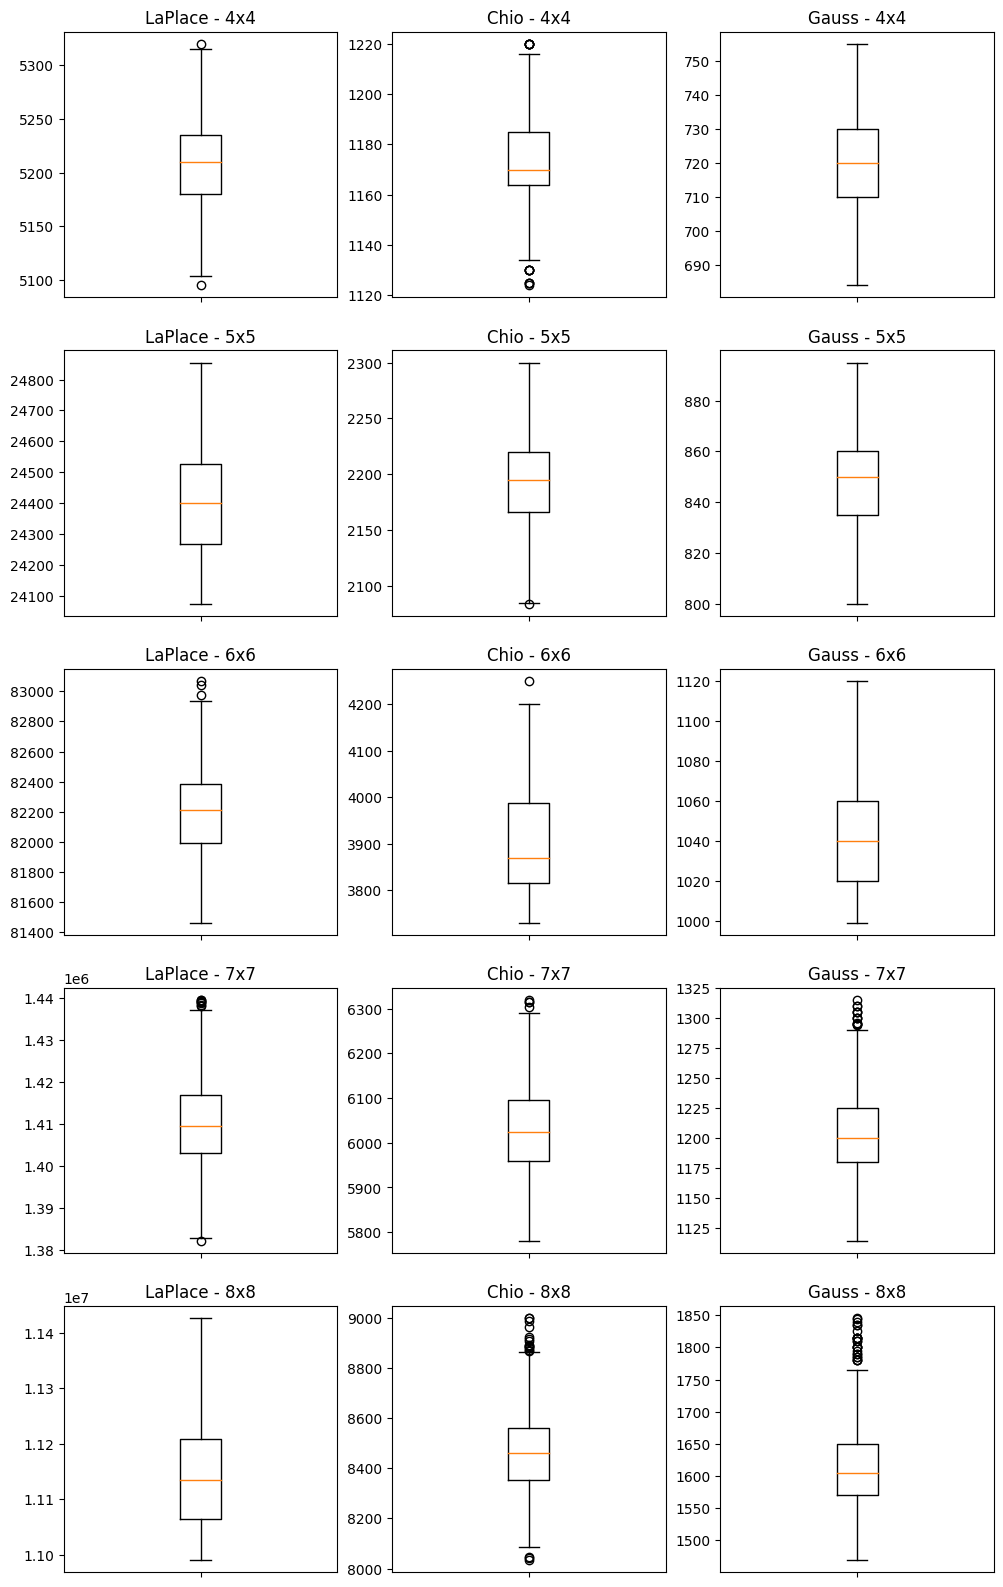

In [39]:
# Refatorar código

transformado = list()
for matriz in resultado:
    
    metodos = list()
    
    # Laplace
    Q1 = np.percentile(matriz['LaPlace'], 25)
    Q3 = np.percentile(matriz['LaPlace'], 75)
    IQR = Q3 - Q1

    sup = (Q3+1.5*IQR)
    sub = (Q1-1.5*IQR)

    upper = matriz['LaPlace'][matriz['LaPlace'] < sup]
    lower = upper[upper > sub]   
    
    metodos.append(lower)
    
    # Chio
    Q1 = np.percentile(matriz['Chio'], 25)
    Q3 = np.percentile(matriz['Chio'], 75)
    IQR = Q3 - Q1

    sup = (Q3+1.5*IQR)
    sub = (Q1-1.5*IQR)

    upper = matriz['Chio'][matriz['Chio'] < sup]
    lower = upper[upper > sub]   
    
    metodos.append(lower)
    
    
    # Gauss
    Q1 = np.percentile(matriz['Gauss'], 25)
    Q3 = np.percentile(matriz['Gauss'], 75)
    IQR = Q3 - Q1

    sup = (Q3+1.5*IQR)
    sub = (Q1-1.5*IQR)

    upper = matriz['Gauss'][matriz['Gauss'] < sup]
    lower = upper[upper > sub]   
    
    metodos.append(lower)
    
    
    
    transformado.append(metodos)
    

fig, ax = plt.subplots(figsize=(12, 20)) 
i = 1
o = 4
ax.remove()
nomeMetodo = ['LaPlace','Chio','Gauss']
for matriz in transformado:
    n = 0
    for metodo in (matriz):
        
        plt.subplot(5, 3, i)
        plt.title(f"{nomeMetodo[n]} - {o}x{o}")
        plt.xticks([2])
        #plt.xlabel(f"{nomeMetodo[n]} - {o}x{o}")
        plt.boxplot(metodo)
        i+=1
        n+=1
    o+=1

plt.show()

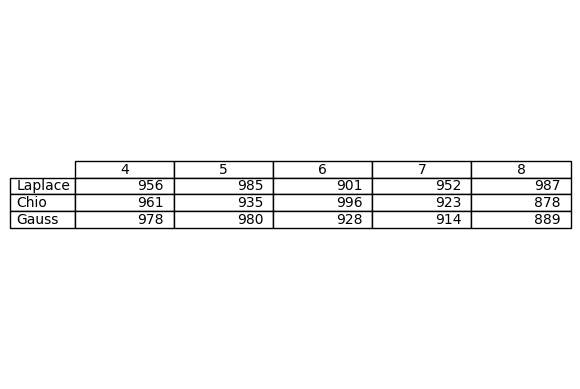

In [19]:
mLaplace = list()
mChio = list()
mGauss = list()

# listas com o cálculo das médias 
for matrizN in transformado:
  mLaplace.append(len(matrizN[0]))
  mChio.append(len(matrizN[1]))
  mGauss.append(len(matrizN[2]))

# variáveis para análise
metodos = ['Laplace', 'Chio', 'Gauss']
ordemMatriz = ['4','5','6','7','8']
medias = {
    'Laplace': mLaplace,
    'Chio': mChio,
    'Gauss' : mGauss
}

fig, ax = plt.subplots(1,1)
data=[mLaplace,
      mChio,
      mGauss
     ]


ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=ordemMatriz,rowLabels=metodos,loc="center")


plt.show()


Com os dados devidamente tratados, decidimos utilizar a média aritmética dos resultados de cada método por tamanho da ordem da matriz.

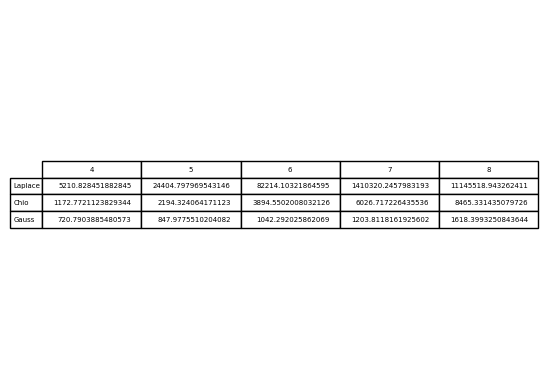

In [18]:
medLaplace = list()
medChio = list()
medGauss = list()

# listas com o cálculo das médias 
for matrizN in transformado:
  medLaplace.append(matrizN[0].mean())
  medChio.append(matrizN[1].mean())
  medGauss.append(matrizN[2].mean())


# variáveis para análise
metodos = ['Laplace', 'Chio', 'Gauss']
ordemMatriz = ['4','5','6','7','8']
medias = {
    'Laplace': medLaplace,
    'Chio': medChio,
    'Gauss' : medGauss
}

fig, ax = plt.subplots(1,1)
data=[medLaplace,
      medChio,
      medGauss
     ]


ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=ordemMatriz,rowLabels=metodos,loc="center")


plt.show()

## Resultados
Para solução de calculo de determinante, em termos computacionais, o método de eliminação de Gauss se demonstrou mais eficiente independentemente da ordem da matriz. O método menos eficiente foi o Teorema de LaPlace.

Os resultados apresentam um aumento exponencial conforme aumenta a ordem da matriz quadrada, mesmo para o método de Regra de Chio, o método de eliminação de Gauss se apresentou mais eficiente.

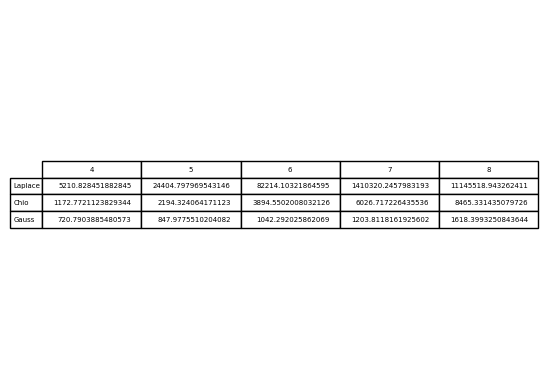

In [134]:

fig, ax = plt.subplots(1,1)
data=[medLaplace,
      medChio,
      medGauss
     ]


ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=ordemMatriz,rowLabels=metodos,loc="center")


plt.show()

### Gráfico
O gráfico no eixo do tempo de execução encntra-se na escala logartima, devido a grande diferença de tempo entre os métodos. 

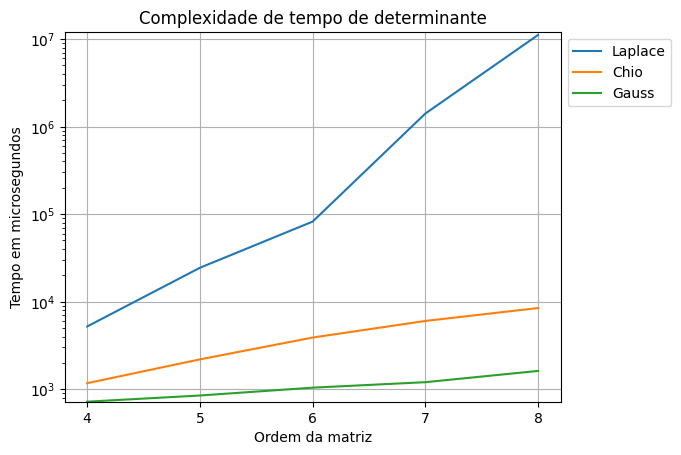

In [135]:
# Axes e títulos
plt.title("Complexidade de tempo de determinante")
plt.xlabel("Ordem da matriz")
plt.xscale('linear')
plt.ylim(4, 8)
plt.ylabel("Tempo em nanosegundos")
plt.ylim(720, 12000000)
plt.yscale('log')

# inserindo elementos para o gráfico
for m in metodos:
    plt.plot(ordemMatriz, medias[m])

# plotagem do gráfico
plt.grid(True)
plt.legend(metodos, bbox_to_anchor=(1, 1))
plt.show()

## Considerações finais
Com esses resultados, conseguimos compreender a importância de compreender a complixidade do algoritmo que desenvolvemos, pois um algoritmo mais otimizado, aumenta a performance de processamento de nosso códigos.